In [1]:
import tensorflow as tf
#from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
#(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [2]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
import numpy as np
np.unique(test_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [4]:
uniq_val, uniq_count = np.unique(test_labels, return_counts=True)

In [5]:
value_counts = dict(zip(uniq_val, uniq_count))
value_counts

{0: 1000,
 1: 1000,
 2: 1000,
 3: 1000,
 4: 1000,
 5: 1000,
 6: 1000,
 7: 1000,
 8: 1000,
 9: 1000}

In [6]:
train_data[7].shape

(28, 28)

In [7]:
train_labels[7]

2

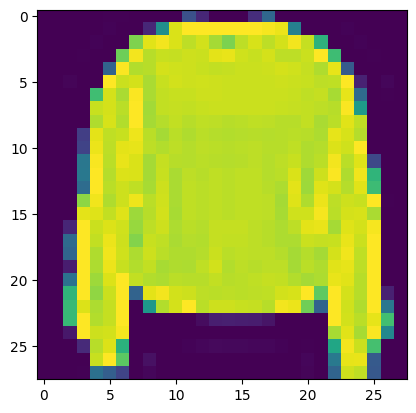

In [8]:
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(train_data,train_labels, test_size=0.2,random_state=42)

In [10]:
X_train.shape,X_val.shape

((48000, 28, 28), (12000, 28, 28))

In [11]:
X_train.shape[1]

28

In [12]:
batch_size = 32
AUTO = tf.data.experimental.AUTOTUNE

In [13]:
#train_ds = tf.data.Dataset.from_tensor_slices(X_train).shuffle(512).batch(batch_size).cache().prefetch(AUTO)
#val_ds = tf.data.Dataset.from_tensor_slices(X_val).batch(batch_size).cache().prefetch(AUTO)

train_ds = tf.data.Dataset.from_tensor_slices(X_train).shuffle(512).batch(batch_size)
val_ds = tf.data.Dataset.from_tensor_slices(X_val).batch(batch_size)


In [14]:
# Fit the model for 20 epochs (5 less than before)
#history = model.fit(train_data, train_labels, epochs=20)

In [15]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

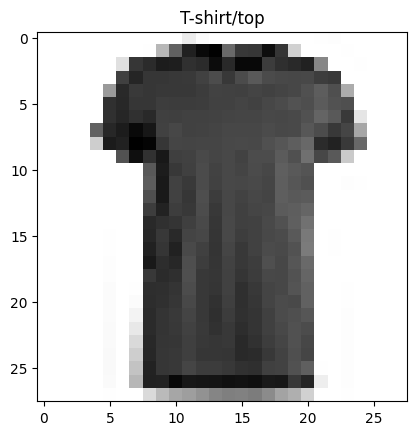

In [16]:
# Plot an example image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[17]]);

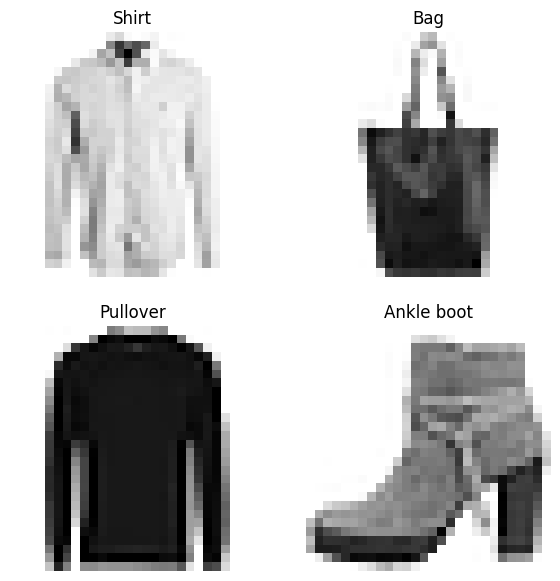

In [17]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [18]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', #tf.keras.losses.SparseCategoricalCrossentropy(),#'Sparsecategorical_crossentropy',
              optimizer='adam', metrics=["accuracy"])

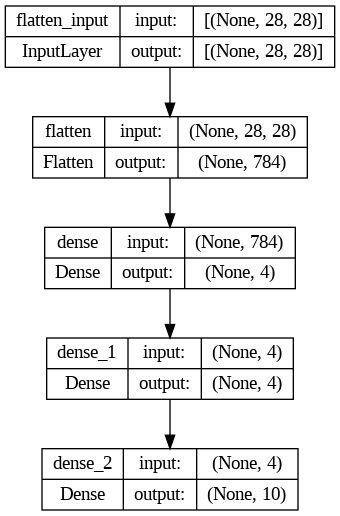

In [19]:
#from tensorflow.keras.utils import plot_model
#plot_model(model, show_shapes=True)
tf.keras.utils.plot_model(model, show_shapes=True)

In [20]:
# Fit the model
non_norm_history = model.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training

Epoch 1/10
1875/1875 [==============================] - 17s 8ms/step - loss: 2.3207 - accuracy: 0.0977 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [23]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.1055 - accuracy: 0.5618 - val_loss: 0.8028 - val_accuracy: 0.6973
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7248 - accuracy: 0.7363 - val_loss: 0.7243 - val_accuracy: 0.7391
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6697 - accuracy: 0.7557 - val_loss: 0.6840 - val_accuracy: 0.7504
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6504 - accuracy: 0.7663 - val_loss: 0.6708 - val_accuracy: 0.7559
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6393 - accuracy: 0.7699 - val_loss: 0.6885 - val_accuracy: 0.7493
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6307 - accuracy: 0.7719 - val_loss: 0.6648 - val_accuracy: 0.7609
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6257 - accuracy: 0.7760 - val_loss: 0.6882 - val_accuracy:

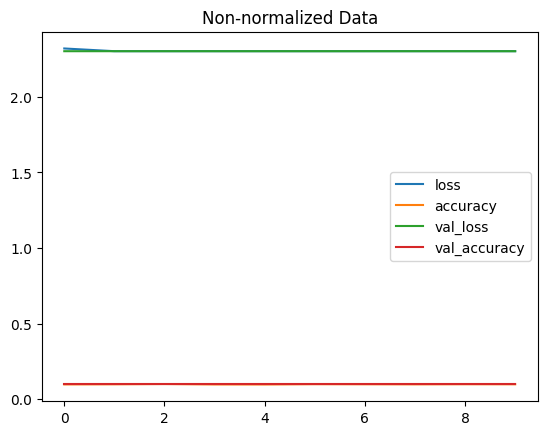

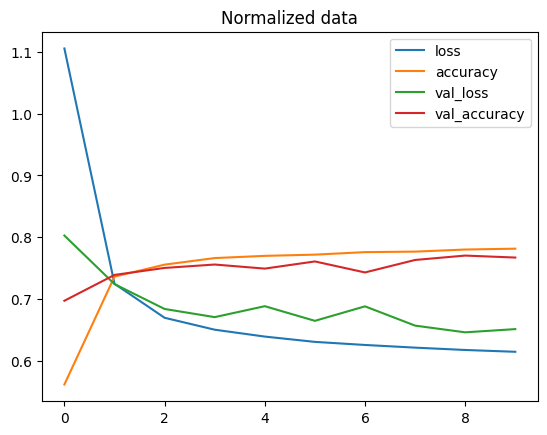

In [24]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data");

In [25]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3017 - accuracy: 0.5411 - val_loss: 0.8170 - val_accuracy: 0.7175 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7456 - accuracy: 0.7381 - val_loss: 0.7383 - val_accuracy: 0.7478 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6946 - accuracy: 0.7499 - val_loss: 0.7089 - val_accuracy: 0.7313 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6700 - accuracy: 0.7576 - val_loss: 0.6871 - val_accuracy: 0.7546 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6529 - accuracy: 0.7612 - val_loss: 0.6678 - val_accuracy: 0.7649 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6364 - accuracy: 0.7672 - val_loss: 0.6879 - val_accuracy: 0.7497 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

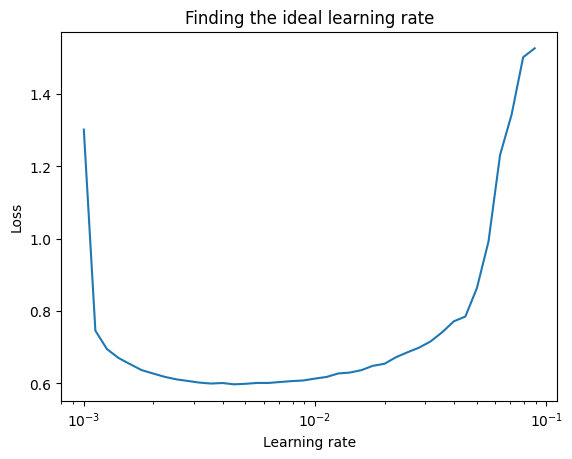

In [26]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [27]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.0861 - accuracy: 0.5916 - val_loss: 0.8236 - val_accuracy: 0.7160
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7430 - accuracy: 0.7468 - val_loss: 0.7268 - val_accuracy: 0.7539
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6614 - accuracy: 0.7724 - val_loss: 0.6534 - val_accuracy: 0.7844
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6188 - accuracy: 0.7901 - val_loss: 0.6294 - val_accuracy: 0.7924
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5960 - accuracy: 0.7977 - val_loss: 0.6119 - val_accuracy: 0.7986
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5812 - accuracy: 0.8040 - val_loss: 0.6119 - val_accuracy: 0.8015
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5723 - accuracy: 0.8062 - val_loss: 0.5959 - val_accuracy:

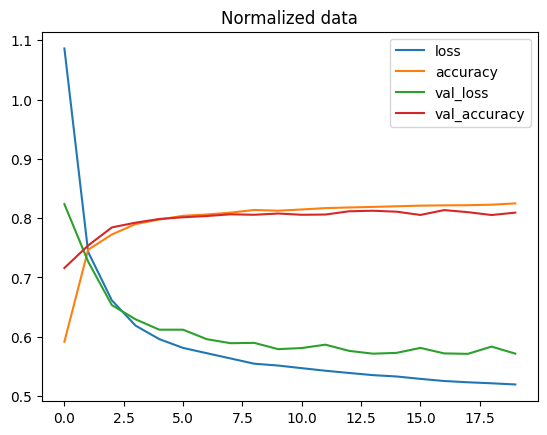

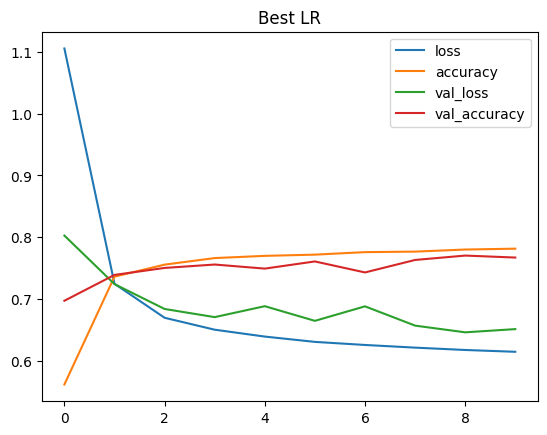

In [29]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(history.history).plot(title="Normalized data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Best LR");

In [30]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [31]:
# Make predictions with the most recent model
y_probs = model_14.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[7.42822621e-08, 2.16929479e-22, 7.77593159e-13, 1.21570311e-16,
        1.34875860e-10, 2.13946521e-01, 2.16736964e-07, 1.93965584e-01,
        5.83527796e-03, 5.86252332e-01],
       [2.17305118e-04, 6.16856149e-11, 8.69527757e-01, 6.96731062e-10,
        8.11374262e-02, 1.38097723e-31, 4.91173193e-02, 0.00000000e+00,
        1.36873737e-07, 1.90655280e-32],
       [2.78416858e-03, 9.95397866e-01, 1.07391370e-05, 1.75580406e-03,
        2.03758773e-07, 6.35499786e-09, 5.09845850e-05, 2.66943677e-16,
        2.14787306e-07, 1.14305336e-10],
       [4.26574051e-03, 9.92235005e-01, 3.08112867e-05, 3.34656611e-03,
        8.40317000e-07, 4.28315836e-08, 1.20346900e-04, 1.07078534e-14,
        6.05854780e-07, 7.85798204e-10],
       [1.15106136e-01, 3.27497014e-06, 1.14362270e-01, 6.58325385e-03,
        9.20952633e-02, 6.94109863e-13, 6.66667998e-01, 1.39825173e-20,
        5.18175587e-03, 3.08528829e-15]], dtype=float32)

In [32]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [33]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [34]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [35]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[711,  17,  12,  80,   2,   0, 166,   0,  12,   0],
       [  6, 946,  11,  30,   4,   0,   3,   0,   0,   0],
       [ 20,   3, 702,   9, 161,   0, 104,   0,   1,   0],
       [ 30,  14,   2, 803,  32,   3, 110,   0,   6,   0],
       [  0,   1, 117,  17, 765,   0,  96,   0,   4,   0],
       [  1,   0,   0,   7,   0, 898,   0,  47,  15,  32],
       [132,   2, 107,  55, 175,   0, 517,   0,  12,   0],
       [  0,   0,   0,   0,   0,  46,   0, 929,   0,  25],
       [  1,   0,   0,  20,  15,   6,  44,   4, 907,   3],
       [  0,   0,   0,   0,   0,  26,   0,  54,   5, 915]])

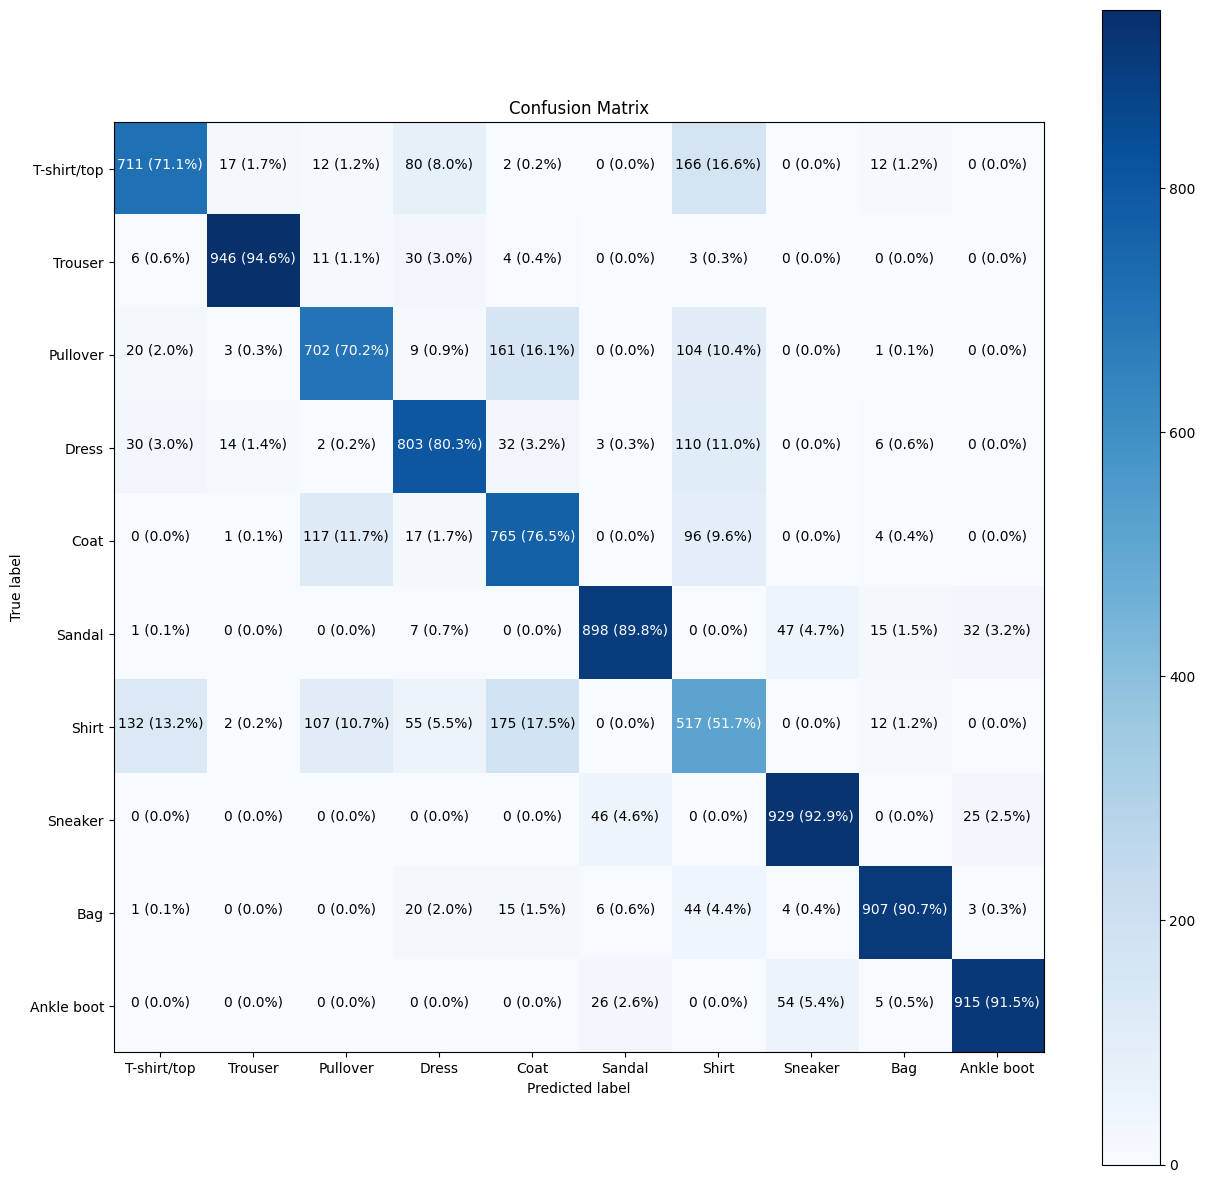

In [36]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [37]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 140ms/step


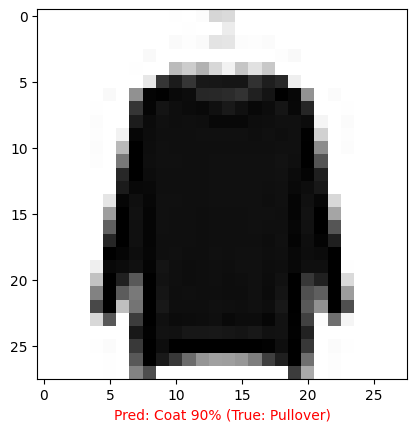

In [38]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)

In [39]:
# Find the layers of our most recent model
model_14.layers

In [40]:
# Extract a particular layer
model_14.layers[1]

In [41]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shape = 1 weight matrix the size of our input data (28x28) per neuron (4)
weights, weights.shape

(array([[-0.19987735, -0.24561316,  0.49137896,  0.09110194],
        [-0.6666176 ,  0.65436375, -0.32080862, -0.6541818 ],
        [-1.0018338 ,  0.17703599, -0.63526076,  0.47690612],
        ...,
        [-0.42570615, -0.31490827, -0.43001166, -0.01179162],
        [-0.34731165, -0.74158186, -0.22618814,  0.25687248],
        [-0.61741376,  0.06273106, -1.0936209 ,  0.37263435]],
       dtype=float32),
 (784, 4))

In [42]:
# Shape = 1 bias per neuron (we use 4 neurons in the first layer)
biases, biases.shape

(array([0.26382652, 1.0052665 , 1.0805568 , 0.40176776], dtype=float32), (4,))

In [43]:
# Can now calculate the number of paramters in our model
model_14.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 4)                 3140      
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
